## Biological image segmentation and cell cluster size quantification
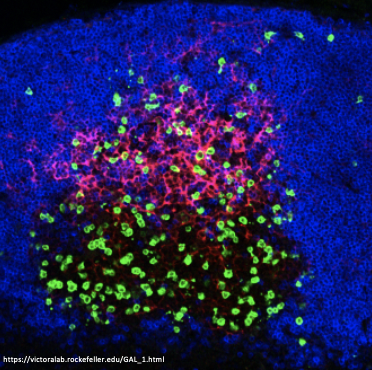
05-11-2020

### Background
##### Germinal center structure in a Lymph node after vaccination
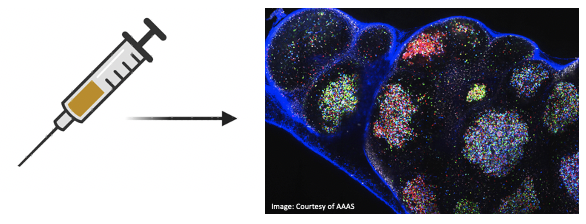
- Average size of the geminal center generated -- how many activated B cells in it
- Number of germinal center clusters in a lymph node

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import skimage.color
import skimage.io
import skimage.viewer
import PIL
import scipy.misc
import scipy.ndimage
import cv2

In [5]:
from skimage.filters import threshold_multiotsu
from PIL import Image
from matplotlib.pyplot import imread

#### Load Lymph node fluoresence image showing germinal center B cells

In [51]:
img_path = "/Users/liuc19/Dropbox/shared_doc/I815_2L_o.tif"
GC_img = skimage.io.imread(fname=img_path)

In [8]:
# GC_img = Image.open(img_path)

In [197]:
# GC_img_truth = matplotlib.pyplot.imread('/Users/liuc19/Dropbox/shared_doc/I815_2L_1.tif')

In [199]:
# GC_truth_gray = skimage.color.rgb2gray(GC_img_truth)

In [9]:
GC_gray = skimage.color.rgb2gray(GC_img)

In [57]:
# viewer2 = skimage.viewer.ImageViewer(GC_gray)

In [58]:
# viewer2.show()

[]

Text(0.5, 1.0, 'grayscale')

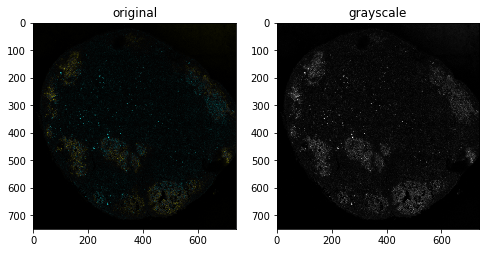

In [62]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.imshow(GC_img); plt.title('original')
plt.subplot(1,2,2)
plt.imshow(GC_gray, cmap='gray'); plt.title('grayscale')

### Pre-processing

In [11]:
median_filtered = scipy.ndimage.median_filter(GC_gray, size = 3)

Text(0.5, 1.0, 'median filtered')

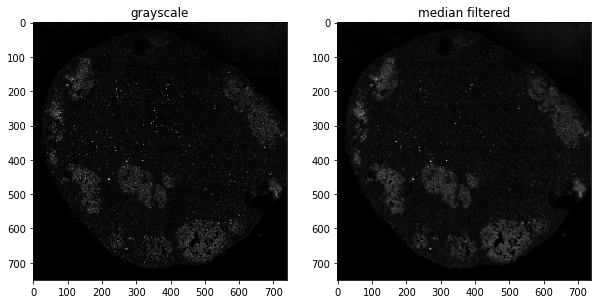

In [59]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(GC_gray, cmap='gray')
plt.title('grayscale')
plt.subplot(1,2,2)
plt.imshow(median_filtered, cmap='gray')
plt.title('median filtered')

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


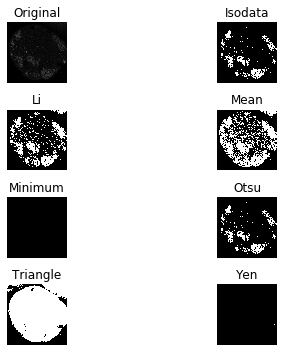

In [13]:
result = skimage.filters.thresholding.try_all_threshold(median_filtered)

In [14]:
# Otsu thresholding and visualization
threshold = skimage.filters.threshold_otsu(median_filtered)
bw_otsu_filtered = np.uint8(median_filtered > threshold) * 255

In [15]:
from scipy import ndimage

Text(0.5, 1.0, 'otsu method filtered')

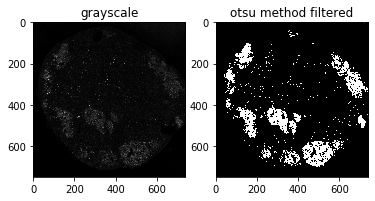

In [17]:
plt.subplot(1,2,1)
plt.imshow(GC_gray, cmap='gray')
plt.title('grayscale')
plt.subplot(1,2,2)
plt.imshow(bw_otsu_filtered, cmap='gray')
plt.title('otsu method filtered')

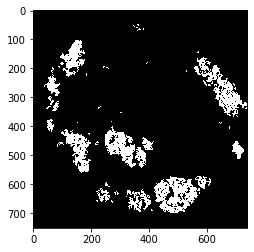

In [18]:
# remove noisy small objects
from skimage.morphology import remove_small_objects
img = np.array(bw_otsu_filtered)
arr = img > 0
bw_otsu_cleared = remove_small_objects(arr, min_size=30)
plt.imshow(bw_otsu_cleared, cmap='gray')

In [19]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
sc = preprocessing.MinMaxScaler()
GC_sc = sc.fit_transform(bw_otsu_cleared)

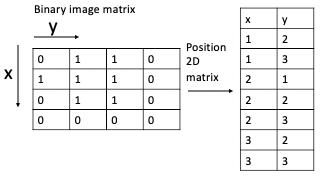

In [65]:
# transfer the image matrix to position 2D matrix
GC_sc_df = pd.DataFrame(GC_sc)
[a, b] = GC_sc_df.shape
row = col = []
pos = 0
for i in range(a):
    for j in range(b):
        if GC_sc_df.iloc[i,j]>0:
            pos = pos + 1
            row.append(i)
            col.append(j)

In [66]:
GC_pos_df = pd.DataFrame(
    {'x': row,
     'y': col
    })
GC_pos_df.sample(6)

,x,y
41579,140,140
78070,599,599
17161,75,75
36159,674,674
35326,340,340
51426,462,462


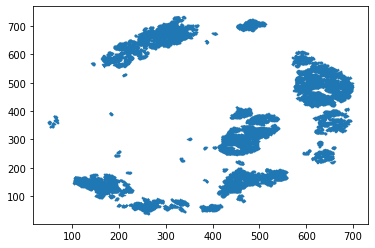

In [22]:
plt.scatter(GC_pos_df['x'], GC_pos_df['y'], s=0.2)

In [23]:
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(GC_pos_df)
    Sum_of_squared_distances.append(km.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

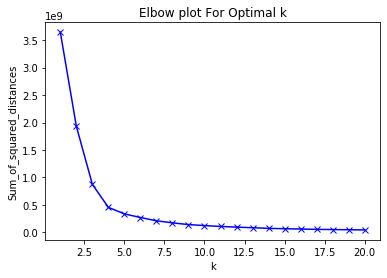

In [176]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow plot For Optimal k')
plt.show

In [24]:
# run kmeans with 8 centroids
km = KMeans(n_clusters=8)
km.fit(GC_pos_df)
y_km = km.predict(GC_pos_df)

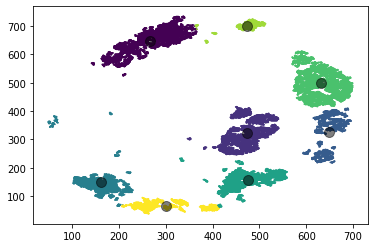

In [178]:
plt.scatter(GC_pos_df['x'], GC_pos_df['y'], s=0.2, c=y_km, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

In [553]:
# segmented_img = km.cluster_centers_[km.labels_]

In [27]:
avg_GC_size = np.count_nonzero(GC_sc_df)/8
print(avg_GC_size)

6595.625


# Another GC image for comparison

In [28]:
img_path2 = "/Users/liuc19/Dropbox/shared_doc/I815_L_o.tif"

In [29]:
GC_img2 = skimage.io.imread(fname=img_path2)

In [30]:
GC_gray2 = skimage.color.rgb2gray(GC_img2)

Text(0.5, 1.0, 'grayscale')

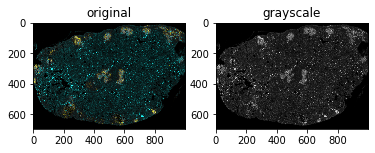

In [31]:
plt.subplot(1,2,1)
plt.imshow(GC_img2)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(GC_gray2, cmap='gray')
plt.title('grayscale')

In [32]:
median_filtered2 = scipy.ndimage.median_filter(GC_gray2, size = 3)

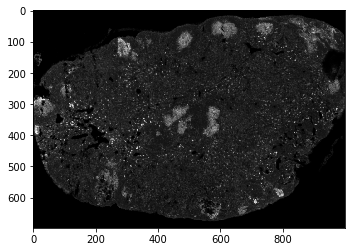

In [33]:
plt.imshow(median_filtered2, cmap = 'gray')

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


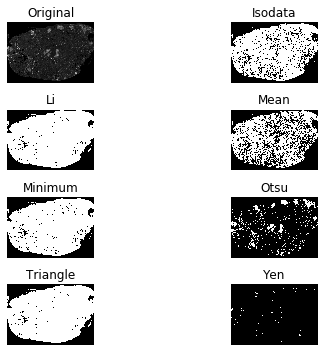

In [34]:
result2 = skimage.filters.thresholding.try_all_threshold(median_filtered2)

In [35]:
# Otsu thresholding and visualization
threshold2 = skimage.filters.threshold_otsu(median_filtered2)

In [36]:
bw_otsu_filtered2 = np.uint8(median_filtered2 > threshold2) * 255

Text(0.5, 1.0, 'otsu method filtered')

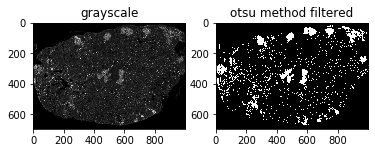

In [37]:
plt.subplot(1,2,1)
plt.imshow(GC_gray2, cmap='gray')
plt.title('grayscale')
plt.subplot(1,2,2)
plt.imshow(bw_otsu_filtered2, cmap='gray')
plt.title('otsu method filtered')

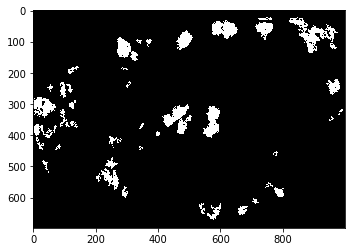

In [38]:
# remove noisy small objects
from skimage.morphology import remove_small_objects
img2 = np.array(bw_otsu_filtered2)
arr2 = img2 > 0
bw_otsu_cleared2 = remove_small_objects(arr2, min_size=100)
plt.imshow(bw_otsu_cleared2, cmap='gray')

In [39]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
sc2 = preprocessing.MinMaxScaler()
GC_sc2 = sc2.fit_transform(bw_otsu_cleared2)

In [40]:
# transfer the image matrix to position 2D matrix
GC_sc_df2 = pd.DataFrame(GC_sc2)
[a2, b2] = GC_sc_df2.shape
row2 = []
col2 = []
pos2 = 0
for i in range(a2):
    for j in range(b2):
        if GC_sc_df2.iloc[i,j]>0:
            pos2 = pos2 + 1
            row2.append(i)
            col2.append(j)

In [41]:
GC_pos_df2 = pd.DataFrame(
    {'x': row2,
     'y': col2
    })
GC_pos_df2.sample(6)

,x,y
35823,556,262
27660,363,569
5308,64,923
37901,633,544
9168,84,923
19160,284,23


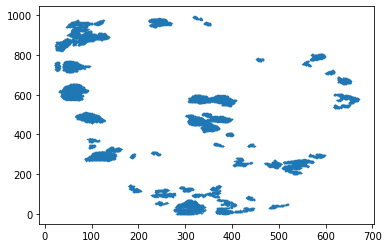

In [42]:
plt.scatter(GC_pos_df2['x'], GC_pos_df2['y'], s=0.1)

In [43]:
Sum_of_squared_distances2 = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(GC_pos_df2)
    Sum_of_squared_distances2.append(km.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

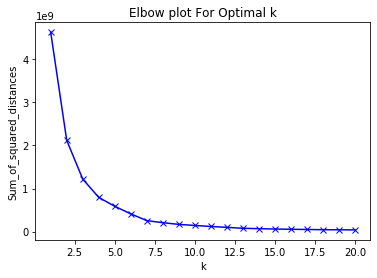

In [44]:
plt.plot(K, Sum_of_squared_distances2, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow plot For Optimal k')
plt.show

In [45]:
# run kmeans with 13 centroids
km2 = KMeans(n_clusters=13)
km2.fit(GC_pos_df2)
y_km2 = km.predict(GC_pos_df2)

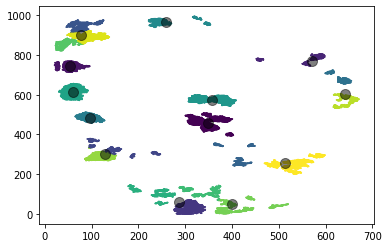

In [46]:
plt.scatter(GC_pos_df2['x'], GC_pos_df2['y'], s=0.2, c=y_km2, cmap='viridis')

centers2 = km2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=100, alpha=0.5)

In [47]:
avg_GC_size2 = np.count_nonzero(GC_sc_df2)/13
print(avg_GC_size2)

3024.6923076923076


In [48]:
avg_GC_list = [avg_GC_size, avg_GC_size2]
label = ["lymph_node1", "lymph_node2"]

<function matplotlib.pyplot.show(*args, **kw)>

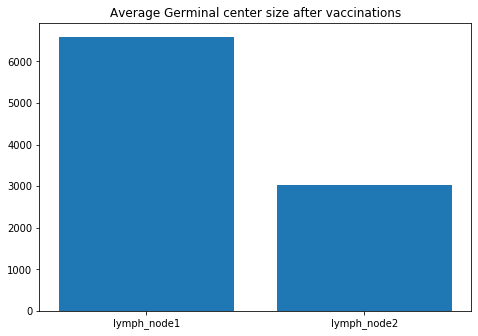

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,avg_GC_list)
plt.title("Average Germinal center size after vaccinations")
plt.show